In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


In [ ]:
from clustering.utils import *

In [ ]:
df, answers, info = get_cluster_input_data()

In [ ]:
pca = PCA(whiten=True)
x_pca = pca.fit_transform(answers)
df_pca = pd.DataFrame(x_pca)
for column in df_pca.columns:
  df_pca.rename(columns={column: 'PC_'+str(column)}, inplace=True)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22
0,-0.699479,-0.770944,-0.628573,-1.347859,-0.362089,1.003139,-0.011299,0.133365,1.154861,-0.111807,...,-0.957681,-1.407215,-0.168092,-0.097181,0.685835,-0.356953,0.306195,0.077293,-0.109585,0.338612
1,-1.042685,0.134720,-0.322130,1.520663,-1.429726,0.553071,-1.170322,-1.384575,-1.049615,0.161217,...,-0.464267,0.185278,-0.768521,-0.094141,0.596653,0.251773,-0.576881,0.916224,0.605884,0.469703
2,-1.090649,0.528105,0.389838,1.141938,1.297194,-1.068319,-0.257879,-0.794440,-0.420931,1.823400,...,1.774954,-0.118987,-0.658195,0.421960,0.272555,1.378523,1.349514,-0.967848,-0.026262,-0.471576
3,0.103301,-1.561799,1.319970,-0.147182,2.345984,1.095251,0.345532,-2.371791,-1.517903,-0.073005,...,1.599826,-3.324811,-3.311031,0.643973,-2.953122,2.798788,-0.336290,-3.166294,-1.930920,-0.205080
4,1.908322,-1.268602,4.034475,-0.402159,0.807604,-0.425695,-1.042586,-1.173911,0.550262,1.374492,...,1.180417,-0.920117,-0.049050,-1.028874,-0.749269,-1.037943,1.624101,0.838465,0.648821,-0.084285


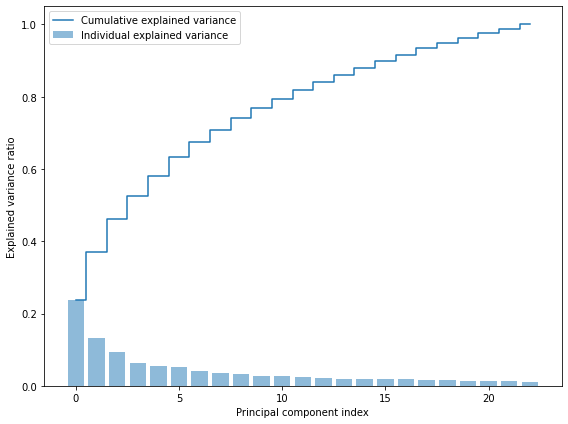

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [ ]:
nr_pc_80 = (cum_sum_eigenvalues<=0.8).sum()
print(nr_pc_80,  ' Werte erklären 80% der Daten.')

11  Werte erklären 80% der Daten.


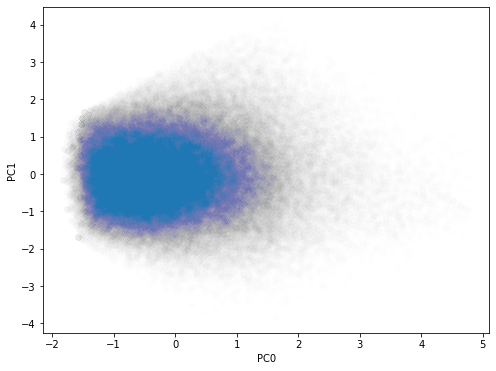

In [ ]:
plt.scatter(x=df_pca[0], y=df_pca[1], alpha=0.005)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

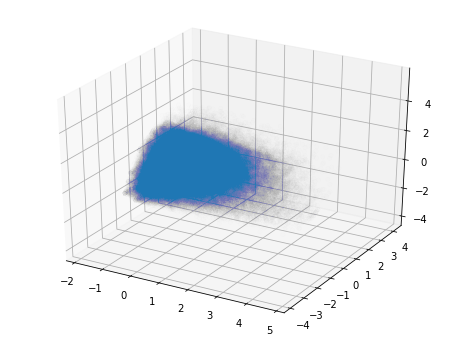

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca[0], df_pca[1], df_pca[2], alpha=0.005)

In [32]:
df_pca_write = pd.concat([df_pca.iloc[:,:nr_pc_80].copy(), df], axis=1)
df_pca_write.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122829 entries, 0 to 122828
Data columns (total 67 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PC_0                                      122829 non-null  float64
 1   PC_1                                      122829 non-null  float64
 2   PC_2                                      122829 non-null  float64
 3   PC_3                                      122829 non-null  float64
 4   PC_4                                      122829 non-null  float64
 5   PC_5                                      122829 non-null  float64
 6   PC_6                                      122829 non-null  float64
 7   PC_7                                      122829 non-null  float64
 8   PC_8                                      122829 non-null  float64
 9   PC_9                                      122829 non-null  float64
 10  PC_10               

In [ ]:
df_pca_write.to_csv('data/preprocessing/dim_reduction/220324_pca_data.csv', index=False)

# Kernel PCA

In [ ]:
df_survey_beh_sample = df_survey_beh.sample(n=10000)

In [ ]:
x_sample = StandardScaler().fit_transform(df_survey_beh_sample)

In [ ]:
x_sample.shape

(10000, 22)

In [ ]:
# To-Do: Check for positive semi definite -eigenvalues are non-negative

In [ ]:
kpca = KernelPCA(n_components=26, eigen_solver='arpack', copy_X=False, kernel='sigmoid')
x_kpca = kpca.fit_transform(x_sample)
df_kpca = pd.DataFrame(x_kpca)
df_kpca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.466390,0.302126,0.118644,0.012638,0.248977,-0.381341,-0.015837,-0.004593,0.138671,-0.350916,...,-0.028234,0.104112,-0.045929,-0.122367,0.085621,-0.011604,-0.034631,-0.000300,0.008577,-0.041149
1,-0.093418,-0.264926,0.183270,-0.147775,0.299435,-0.007069,-0.043500,-0.042675,-0.128777,0.160317,...,0.032661,-0.126259,0.038438,0.040414,0.013526,0.001774,0.042204,-0.014326,-0.030870,0.001323
2,0.309963,0.256956,-0.048864,-0.256740,0.005405,0.024832,-0.054430,-0.170896,-0.040618,-0.054067,...,-0.002022,-0.003709,-0.012431,0.038405,-0.022747,0.082069,-0.054764,-0.035319,0.044554,0.012240
3,0.066850,-0.108863,-0.049323,0.224350,0.078553,0.010610,0.081784,0.054939,0.011856,0.055454,...,-0.088955,-0.033308,0.033609,-0.116695,0.031079,0.069647,0.020821,0.018718,0.013688,0.033658
4,0.567640,-0.529334,0.628120,-0.069331,0.072804,0.093121,0.087517,-0.094965,-0.022075,-0.159308,...,0.070810,-0.088398,-0.048873,0.005095,0.014612,0.028138,-0.122948,0.014118,0.055222,0.244666


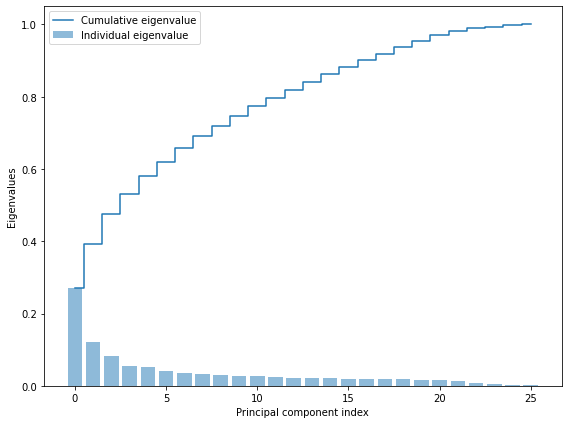

In [ ]:
var_values = kpca.eigenvalues_ / sum(kpca.eigenvalues_)

cum_sum_eigenvalues_kpca = np.cumsum(var_values)

plt.bar(range(0,len(var_values)), var_values, alpha=0.5, align='center', label='Individual eigenvalue')
plt.step(range(0,len(cum_sum_eigenvalues_kpca)), cum_sum_eigenvalues_kpca, where='mid',label='Cumulative eigenvalue')
plt.ylabel('Eigenvalues')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [ ]:
print((cum_sum_eigenvalues_kpca<=0.8).sum(),  ' Werte erklären 80% der Daten.')

12  Werte erklären 80% der Daten.


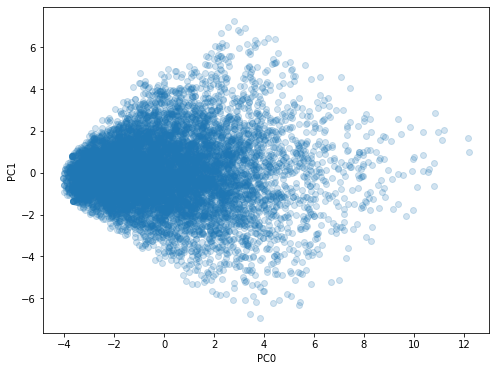

In [ ]:
plt.scatter(x=df_kpca[0], y=df_kpca[1], alpha=0.2)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()